# Data Exploration

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')

In [3]:
df = pd.read_csv('derived_data/train_data_merged.csv')

In [4]:
df.head()

,jobId,salary,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,130,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,101,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,137,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,142,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,163,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


## Checking for Duplicate jobIds

In [8]:
#Is there one record per job?
df.jobId.nunique() == len(df)

True

Good! Each jobID is unique

## Exploring Null Values

In [9]:
#How many values with NULL are there per feature?
df.isnull().sum().sort_values(ascending=False)

milesFromMetropolis    0
yearsExperience        0
industry               0
major                  0
degree                 0
jobType                0
companyId              0
salary                 0
jobId                  0
dtype: int64

Great! No Nulls

## Exploring Unique Values

In [10]:
# Are there any features with nonunique values? We'll throw them out as they will not be useful to our model
df.nunique().sort_values(ascending=False)

jobId                  1000000
salary                     280
milesFromMetropolis        100
companyId                   63
yearsExperience             25
major                        9
jobType                      8
industry                     7
degree                       5
dtype: int64

Good! All features have unique values

## Inspecting the Target Variable

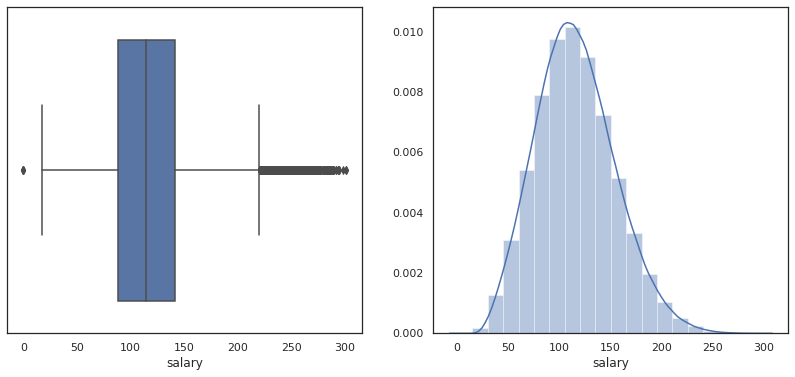

In [38]:
plt.figure(figsize = (14, 6))
plt.subplot(1,2,1)
sns.boxplot(df.salary)
plt.subplot(1,2,2)
sns.distplot(df.salary, bins=20)
plt.show()

* We have potential outliers to clean
* The target variable distribution is normal
* we have much flexibility when chossing selected ML algorithms that will help with this Regression problem
        (Linear methords, Trees)

## Summerize Numerical Features

In [11]:
df.describe()

,salary,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000,1000000.000000
mean,116.061818,11.992386,49.529260
std,38.717936,7.212391,28.877733
min,0.000000,0.000000,0.000000
25%,88.000000,6.000000,25.000000
50%,114.000000,12.000000,50.000000
75%,141.000000,18.000000,75.000000
max,301.000000,24.000000,99.000000


## Summerize Categorical Feature

In [8]:
df.describe(include=['object'])

,jobId,companyId,jobType,degree,major,industry
count,1000000,1000000,1000000,1000000,1000000,1000000
unique,1000000,63,8,5,9,7
top,JOB1362684853835,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236976,532355,143206


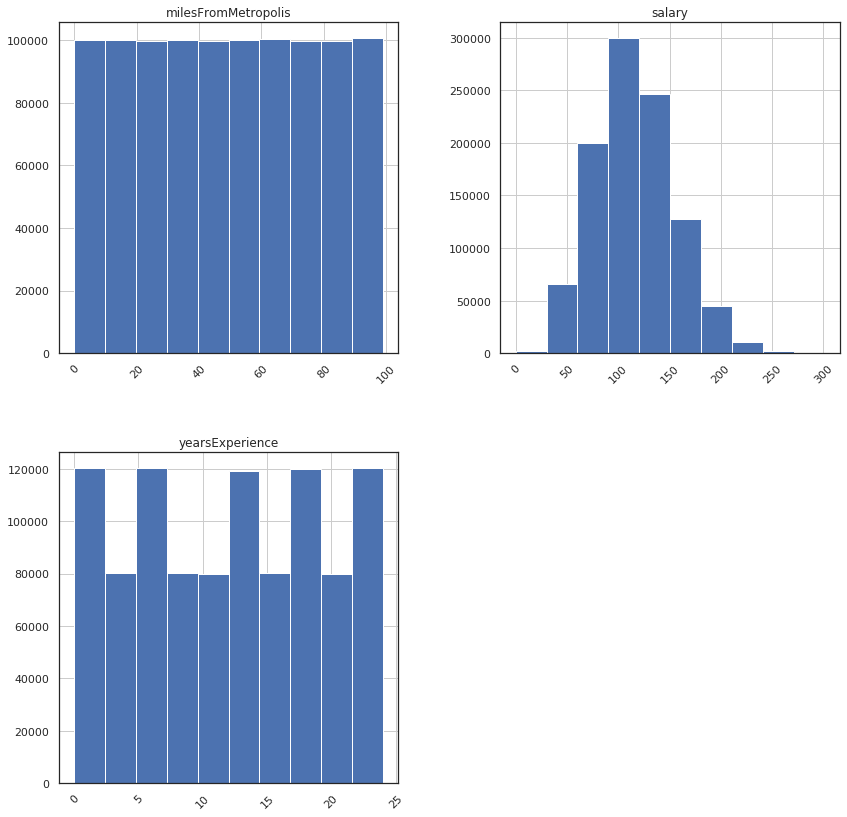

In [25]:
# Ploting a larger and legible histogram grid
df.hist(xrot = 45, figsize = (14,14))

# Clear the text "residue"...i.e. gives plots of histograms without extra text at the begining
plt.show()

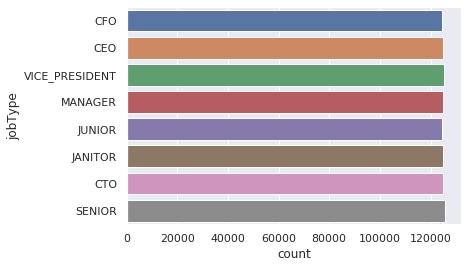

In [43]:
# Bar plot for 'jobType'
sns.countplot(y='jobType', data=df)
plt.show()

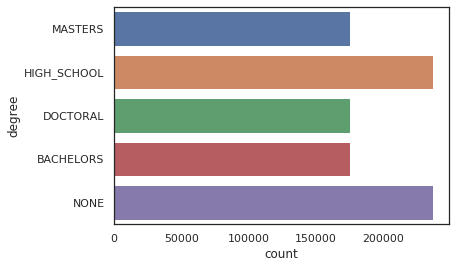

In [27]:
# Bar plot for 'degree'
sns.countplot(y='degree', data=df)
plt.show()

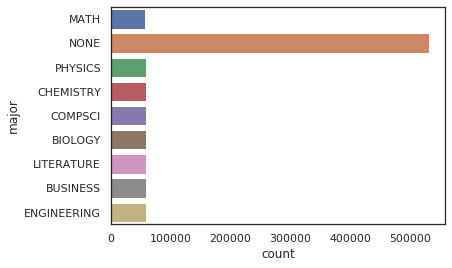

In [28]:
# Bar plot for 'major'
sns.countplot(y='major', data=df)
plt.show()

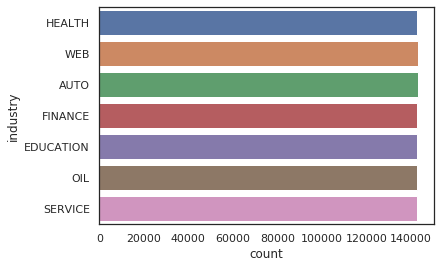

In [29]:
# Bar plot for 'industry'
sns.countplot(y='industry', data=df)
plt.show()

All industries are equally represented in our dataset

## Feature Segmentation

We use segmentation to understand any relationships between selected categorical and numerical features

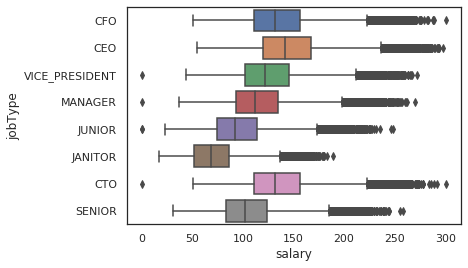

In [30]:
# Segment salary by jobType and plot distributions
sns.boxplot(y='jobType', x='salary', data=df)

* CEO, CEO, and CTO seem to have the highest salary paid on average title in our dataset
* JANITOR has the lowest salary paid title on average

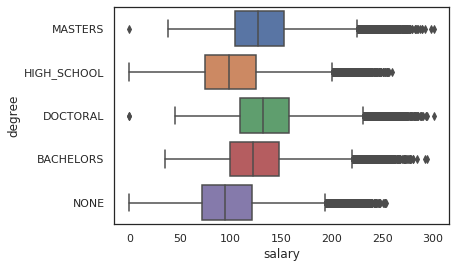

In [31]:
# Segment salary by degree and plot distributions
sns.boxplot(y='degree', x='salary', data=df)

* DOCTORAL degree positions have the highest salary paid on average
* NONE degree positions have the lowest salary paid on average

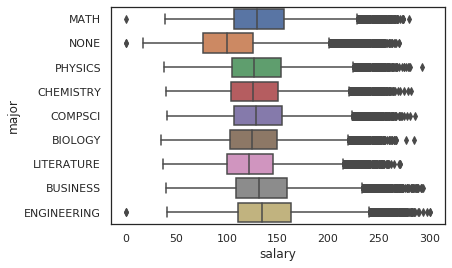

In [32]:
# Segment salary by major and plot distributions
sns.boxplot(y='major', x='salary', data=df)

* NONE degree salaries are the lowest on average
* Engineering and Business degree have the highest salaries on average

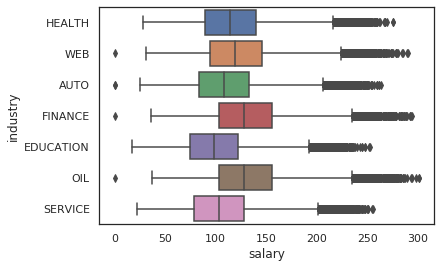

In [33]:
# Segment salary by industry and plot distributions
sns.boxplot(y='industry', x='salary', data=df)

* EDUCATION is the least paid industry on average
* OIL is the highest paying industry on average

In [22]:
# Segment by industry and displaying the means and standard deviations within each class
df.groupby('industry').agg(['mean', 'std'])

salary            yearsExperience            \
                 mean        std            mean       std   
industry                                                     
AUTO       109.433690  36.093659       11.974668  7.219700   
EDUCATION   99.448386  35.110257       12.000105  7.205118   
FINANCE    130.746743  38.321247       12.009715  7.202528   
HEALTH     115.735540  36.865179       11.972856  7.209234   
OIL        130.952946  38.529981       12.006486  7.214457   
SERVICE    104.446820  35.577606       11.994665  7.216536   
WEB        121.644512  38.166879       11.988227  7.219190   

          milesFromMetropolis             
                         mean        std  
industry                                  
AUTO                49.553521  28.770938  
EDUCATION           49.586442  28.862404  
FINANCE             49.532635  28.947247  
HEALTH              49.501061  28.904641  
OIL                 49.490303  28.920243  
SERVICE             49.577878  28.897623  
WEB                 49.463172  28.841275

* FINANCE and OIL are the highest paying industries on average

In [23]:
# Segment by jobType and displaying the means and standard deviations within each class
df.groupby('jobType').agg(['mean', 'std'])

salary            yearsExperience            \
                      mean        std            mean       std   
jobType                                                           
CEO             145.311425  34.423846       11.998269  7.215689   
CFO             135.458547  33.069203       11.990440  7.222927   
CTO             135.479983  33.093032       12.010812  7.209860   
JANITOR          70.813045  24.643021       11.969657  7.211544   
JUNIOR           95.331557  29.249018       11.992287  7.204760   
MANAGER         115.367596  30.835467       11.987332  7.207583   
SENIOR          105.487775  30.069722       11.996624  7.211765   
VICE_PRESIDENT  125.367629  31.958131       11.993628  7.215160   

               milesFromMetropolis             
                              mean        std  
jobType                                        
CEO                      49.478458  28.914141  
CFO                      49.572715  28.925565  
CTO                      49.580930  28.848142  
JANITOR                  49.443815  28.842493  
JUNIOR                   49.659968  28.866815  
MANAGER                  49.498006  28.874148  
SENIOR                   49.572558  28.921242  
VICE_PRESIDENT           49.428059  28.829238

In [24]:
# Segment by major and displaying the means and standard deviations within each class
df.groupby('major').agg(['mean', 'std'])

salary            yearsExperience            \
                   mean        std            mean       std   
major                                                          
BIOLOGY      127.932664  34.820141       11.991213  7.209671   
BUSINESS     135.648980  37.006526       12.011244  7.244691   
CHEMISTRY    129.072085  34.832396       11.975185  7.196921   
COMPSCI      132.075605  34.776640       11.979086  7.204602   
ENGINEERING  138.436617  38.186849       11.987832  7.229369   
LITERATURE   124.423097  33.576413       12.010991  7.216222   
MATH         133.319735  35.543265       11.992249  7.199246   
NONE         102.583479  36.136748       11.993119  7.211314   
PHYSICS      130.372436  34.956981       11.984626  7.208351   

            milesFromMetropolis             
                           mean        std  
major                                       
BIOLOGY               49.524487  28.846149  
BUSINESS              49.630251  28.839768  
CHEMISTRY             49.553104  28.937122  
COMPSCI               49.676099  28.888418  
ENGINEERING           49.576524  28.866776  
LITERATURE            49.694363  28.907405  
MATH                  49.422311  28.871970  
NONE                  49.485332  28.874916  
PHYSICS               49.554956  28.889607

* ENGINEERING degrees have the highest salaries on average

In [25]:
# Checking memory
!free -m

              total        used        free      shared  buff/cache   available
Mem:           9041        2708        2310         125        4022        5932
Swap:          2047           0        2047


## Correlation

Calculating correlations for numerical features

In [49]:
correlations = df.corr(method ='pearson')
correlations

,salary,yearsExperience,milesFromMetropolis
salary,1.000000,0.375013,-0.297666
yearsExperience,0.375013,1.000000,0.000673
milesFromMetropolis,-0.297666,0.000673,1.000000


It doesn't appear the features are strongly correlated with the target variable

In [46]:
df.head()

,jobId,salary,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,130,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,101,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,137,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,142,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,163,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


## Checking for Outliers

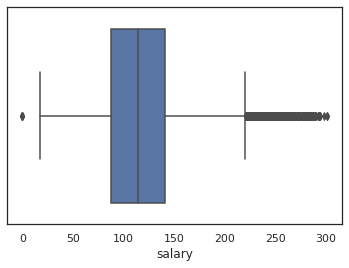

In [34]:
# Box plot of 'salary' using the Seaborn library
sns.boxplot(df.salary)
plt.show()

In [28]:
#Sorting salary and displaying last ten rows
df.salary.sort_values(ascending = True).head(10)

828156     0
652076     0
495984     0
30559      0
816129     0
141942    17
482429    18
807108    18
188931    18
60556     19
Name: salary, dtype: int64

In [29]:
#We can select the specific rows using the row's index as below
df.iloc[[828156,652076,495984,30559,816129]]

,jobId,salary,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
828156,JOB1362685235843,0,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29
652076,JOB1362685059763,0,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60
495984,JOB1362684903671,0,COMP34,JUNIOR,NONE,NONE,OIL,1,25
30559,JOB1362684438246,0,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7
816129,JOB1362685223816,0,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6


* We'll remove these data points with missing salaries in the next phase as they will not be useful to our model

In [30]:
#Sorting salary and displaying last ten rows
df.salary.sort_values(ascending = False).head(10)

400611    301
685562    301
572777    298
293221    294
911747    294
905713    293
503962    293
884902    292
47203     292
377196    290
Name: salary, dtype: int64

In [110]:
# As a sanity check we can select the specific rows using the row's index as below
df.iloc[[400611,685562,572777,293221,911747]]

,jobId,salary,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
400611,JOB1362684808298,301,COMP45,CFO,DOCTORAL,ENGINEERING,OIL,23,3
685562,JOB1362685093249,301,COMP47,CTO,MASTERS,ENGINEERING,OIL,24,0
572777,JOB1362684980464,298,COMP60,CEO,MASTERS,ENGINEERING,OIL,22,1
293221,JOB1362684700908,294,COMP44,CEO,DOCTORAL,ENGINEERING,OIL,19,18
911747,JOB1362685319434,294,COMP3,CEO,BACHELORS,BUSINESS,FINANCE,24,28


* Nothing appears to be unexpected

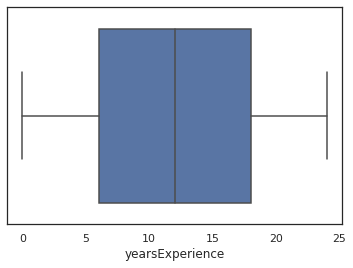

In [35]:
# Box plot of 'yearsExperience' using the Seaborn library
sns.boxplot(df.yearsExperience)
plt.show()

Great! No outliers

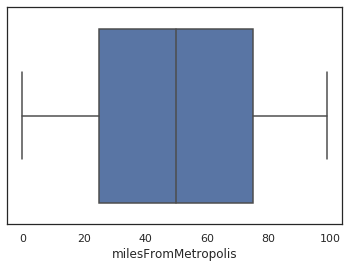

In [36]:
# Box plot of 'milesFromMetropolis' using the Seaborn library
sns.boxplot(df.milesFromMetropolis)
plt.show()

Great! the feature 'milesFromMetropolis' has no outliers